In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pandas as pd
from rdkit.Chem import rdFingerprintGenerator,MolToSmiles,PandasTools
from mordred import Calculator, descriptors
import numpy as np

In [157]:
datasPandas = PandasTools.LoadSDF("data/chin-qspr-dataset.sdf")


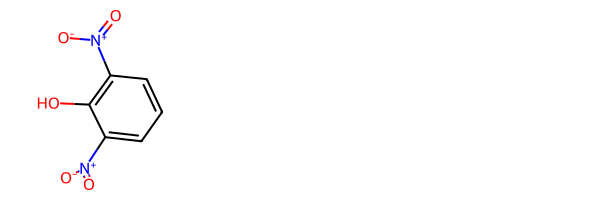

In [83]:
PandasTools.FrameToGridImage( datasPandas[datasPandas["pLC50"].astype("float")>10])

In [82]:
datasPandas[datasPandas["pLC50"].astype("float")>10]

,pLC50,compound_id,ID,ROMol
313,24.5622,compound-314,Compound 314,<rdkit.Chem.rdchem.Mol object at 0x0000019C816...


In [188]:
datasPandas["smiles"] = [Chem.MolToSmiles(mol) for mol in datasPandas["ROMol"]]

In [192]:
datasPandas[datasPandas["smiles"].duplicated()]

,pLC50,compound_id,ID,ROMol,2dpharmacoreFPs,smiles


In [68]:
datasPandas.sort_values(by="pLC50",ascending=False)[datasPandas["compound_id"]=="compound-314"]

C:\Users\keny\AppData\Local\Temp\ipykernel_41484\1345217392.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datasPandas.sort_values(by="pLC50",ascending=False)[datasPandas["compound_id"]=="compound-314"]


,pLC50,compound_id,ID,ROMol
313,24.5622,compound-314,Compound 314,<rdkit.Chem.rdchem.Mol object at 0x0000019CFE7...


In [35]:
tox_data = pd.read_csv(r"data\molecules_with_descriptors.csv",index_col=[0])

### Remove duplicates

c:\Users\keny\Nextcloud2\Uni\Chinf\group_project\chin_group_project\.venv\lib\site-packages\rdkit\Chem\PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,pLC50,compound_id,ID,ROMol,smiles
0,2.583,compound-1,Compound 1,,CCOC(C)=O
1,2.263,compound-2,Compound 2,,NC(=O)c1ccccc1
2,3.662,compound-3,Compound 3,,CCCCC(=O)CCCC
3,3.728,compound-4,Compound 4,,CCOc1ccc(C=O)cc1
4,5.485,compound-5,Compound 5,,C#C[C@H](O)CCCCC
...,...,...,...,...,...
370,3.408,compound-371,Compound 371,,ClCC(Cl)CCl
371,3.391,compound-372,Compound 372,,ClCCCCCl
372,3.278,compound-373,Compound 373,,CCOc1cc(C=O)ccc1O
373,2.924,compound-374,Compound 374,,OCC(F)(F)F

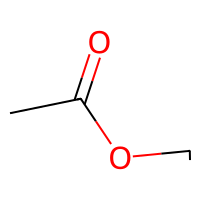
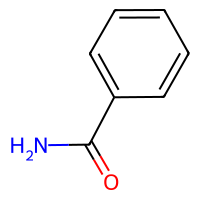
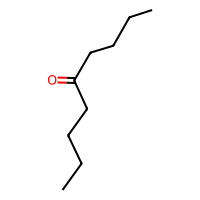
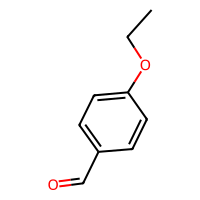
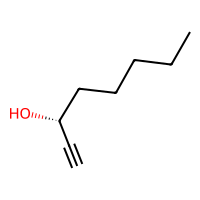
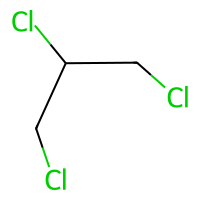
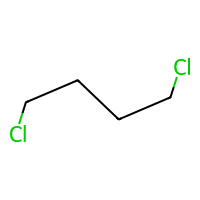
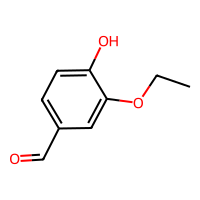
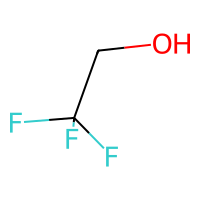
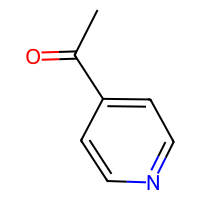

In [166]:
datasPandas

In [168]:
def remove_mol_duplicates(df):
    df["smiles"] = [Chem.MolToSmiles(mol) for mol in df["ROMol"]]
    duplicates = df["smiles"].duplicated(keep=False)
    df =df[~duplicates]
    df.drop(["smiles"],axis=1)
    return df

In [169]:
remove_mol_duplicates(datasPandas)

,pLC50,compound_id,ID,ROMol,smiles
0,2.583,compound-1,Compound 1,<rdkit.Chem.rdchem.Mol object at 0x000001E8866...,CCOC(C)=O
1,2.263,compound-2,Compound 2,<rdkit.Chem.rdchem.Mol object at 0x000001E885E...,NC(=O)c1ccccc1
2,3.662,compound-3,Compound 3,<rdkit.Chem.rdchem.Mol object at 0x000001E885E...,CCCCC(=O)CCCC
3,3.728,compound-4,Compound 4,<rdkit.Chem.rdchem.Mol object at 0x000001E885E...,CCOc1ccc(C=O)cc1
4,5.485,compound-5,Compound 5,<rdkit.Chem.rdchem.Mol object at 0x000001E885E...,C#C[C@H](O)CCCCC
...,...,...,...,...,...
370,3.408,compound-371,Compound 371,<rdkit.Chem.rdchem.Mol object at 0x000001E8CA2...,ClCC(Cl)CCl
371,3.391,compound-372,Compound 372,<rdkit.Chem.rdchem.Mol object at 0x000001E8CA2...,ClCCCCCl
372,3.278,compound-373,Compound 373,<rdkit.Chem.rdchem.Mol object at 0x000001E8CA2...,CCOc1cc(C=O)ccc1O
373,2.924,compound-374,Compound 374,<rdkit.Chem.rdchem.Mol object at 0x000001E8CA2...,OCC(F)(F)F


In [162]:
datasPandas["smiles"] = [Chem.MolToSmiles(mol) for mol in datasPandas["ROMol"]]
duplicates = datasPandas["smiles"].duplicated(keep=False)
#datasPandas =datasPandas[~duplicates]
#datasPandas.drop(["smiles"],axis=1)

In [36]:
tox_data

,compound_id,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,compound_toxicity
0,compound-1,88.052429,88.106,2.0,0.0,1.0,0.0,2.0,6.0,14.0,...,1.904030,0.347601,0.347601,0.203263,-0.53,5.470000,2.693714,3.470000,2.455769,2.583
1,compound-2,121.052764,121.139,2.0,2.0,1.0,1.0,1.0,9.0,16.0,...,2.653483,1.058307,1.058307,0.602419,-1.31,5.820039,2.306764,1.287705,1.491717,2.263
2,compound-3,142.135765,142.242,1.0,0.0,6.0,0.0,1.0,10.0,28.0,...,4.325444,1.618338,1.618338,0.872891,-0.33,9.670000,6.785340,5.800378,6.561424,3.662
3,compound-4,150.068080,150.177,2.0,0.0,3.0,0.0,2.0,11.0,21.0,...,3.545651,1.327187,1.327187,0.809287,-1.31,7.793199,3.760481,2.075225,2.664198,3.728
4,compound-5,126.104465,126.199,1.0,1.0,4.0,1.0,1.0,9.0,23.0,...,3.450904,1.273501,1.273501,0.671020,-0.48,8.520000,5.652979,5.390149,5.351487,5.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,compound-371,145.945683,147.432,0.0,0.0,2.0,0.0,0.0,6.0,11.0,...,1.569237,0.334860,0.334860,0.041239,0.87,6.870000,4.040358,3.075339,4.626210,3.408
371,compound-372,126.000306,127.014,0.0,0.0,3.0,0.0,0.0,6.0,14.0,...,2.034522,0.517261,0.517261,0.188982,0.58,6.580000,5.580000,4.580000,6.119400,3.391
372,compound-373,166.062994,166.176,3.0,1.0,3.0,1.0,3.0,12.0,22.0,...,3.685924,1.419788,1.419788,0.875136,-1.51,8.585329,3.758873,1.751580,2.689264,3.278
373,compound-374,100.013599,100.039,1.0,1.0,0.0,1.0,1.0,6.0,9.0,...,1.236728,0.179284,0.179284,0.000000,-0.25,5.750000,1.466049,3.750000,1.404964,2.924


In [117]:
from rdkit import Chem

from rdkit.Chem import ChemicalFeatures

from rdkit import RDConfig
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
from rdkit.Chem.Pharm2D import Generate
import os

In [88]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')

In [176]:
def create_fp_dataframe(mols,fp_type,fpsize,fpgen):
    colnames = [f"{fp_type}_bit_{i}"for i in range(fpsize)]
    fp_lists =  [ Generate.Gen2DFingerprint(mol,fpgen).ToList() for mol in mols]
    return pd.DataFrame(fp_lists,columns=colnames)



In [92]:
fdefName

'c:\\Users\\keny\\Nextcloud2\\Uni\\Chinf\\group_project\\chin_group_project\\.venv\\lib\\site-packages\\rdkit\\Data\\BaseFeatures.fdef'

In [132]:
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
sigFactory = SigFactory(factory,minPointCount=2,maxPointCount=3,trianglePruneBins=False)
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
sigFactory.GetSigSize()

3348

In [144]:
sig = Generate.Gen2DFingerprint(datasPandas.iloc[1]["ROMol"],sigFactory)

In [143]:
sigFactory.GetFeatFamilies()

['Acceptor',
 'Aromatic',
 'Donor',
 'Hydrophobe',
 'LumpedHydrophobe',
 'NegIonizable',
 'PosIonizable',
 'ZnBinder']

In [159]:
sigFactory.GetBitDescription(1000)

'Acceptor PosIonizable PosIonizable |0 0 0|0 0 1|0 1 0|'

## FIngerprint generation

In [187]:
create_features(datasPandas["ROMol"])

,2Dpharmacore_bit_0,2Dpharmacore_bit_1,2Dpharmacore_bit_2,2Dpharmacore_bit_3,2Dpharmacore_bit_4,2Dpharmacore_bit_5,2Dpharmacore_bit_6,2Dpharmacore_bit_7,2Dpharmacore_bit_8,2Dpharmacore_bit_9,...,MACCSFP_bit_157,MACCSFP_bit_158,MACCSFP_bit_159,MACCSFP_bit_160,MACCSFP_bit_161,MACCSFP_bit_162,MACCSFP_bit_163,MACCSFP_bit_164,MACCSFP_bit_165,MACCSFP_bit_166
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,1,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,1,1,1,1,0,0,1,1,0,...,1,0,1,1,0,1,1,1,1,0
373,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Actual Feature Selection

In [3]:
from src.features import create_features,PharmaCore2DGPGen

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression,SequentialFeatureSelector

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [29]:
from sklearn import set_config
set_config(transform_output = "pandas")


In [177]:
descriptors = pd.read_csv("data/molecules_descriptors_mordred.csv").iloc[:,2:]

In [178]:
data = create_features(remove_mol_duplicates(datasPandas)["ROMol"])
data["compound_toxicity"] = datasPandas["pLC50"].astype("float")
data.to_csv("data/fp_features.csv",index=False)

In [180]:
descriptors_and_fp = pd.concat([data,descriptors],axis=1)

In [181]:
descriptors_and_fp

,2Dpharmacore_bit_0,2Dpharmacore_bit_1,2Dpharmacore_bit_2,2Dpharmacore_bit_3,2Dpharmacore_bit_4,2Dpharmacore_bit_5,2Dpharmacore_bit_6,2Dpharmacore_bit_7,2Dpharmacore_bit_8,2Dpharmacore_bit_9,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,compound_toxicity
0,0,1,0,0,0,0,0,0,0,0,...,29.439488,88.052429,6.289459,32,3,20.0,18.0,3.611111,1.583333,2.583
1,0,0,0,0,1,0,0,1,0,0,...,37.289972,121.052764,7.565798,88,9,40.0,43.0,3.472222,2.111111,2.263
2,0,0,0,0,0,0,0,0,0,0,...,36.593370,142.135765,5.076277,149,8,36.0,35.0,4.611111,2.666667,3.662
3,0,0,1,1,1,0,0,0,0,0,...,40.148993,150.068080,7.146099,170,12,48.0,52.0,3.972222,2.750000,3.728
4,0,0,0,0,0,0,0,0,0,0,...,34.994205,126.104465,5.482803,110,7,32.0,31.0,4.361111,2.416667,5.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0,...,29.753427,145.945683,13.267789,31,4,20.0,19.0,3.611111,1.666667,3.408
362,0,0,0,0,0,0,0,0,0,0,...,28.105124,126.000306,9.000022,35,3,18.0,16.0,3.000000,1.750000,3.391
363,0,1,1,1,1,0,0,1,1,0,...,42.029522,166.062994,7.548318,202,15,54.0,60.0,4.833333,2.944444,3.278
364,0,0,0,0,0,0,0,0,0,0,...,31.665095,100.013599,11.112622,28,3,24.0,22.0,4.312500,1.375000,2.924


In [182]:
descriptors_and_fp.to_csv("data/descriptor_fp_features.csv",index=False)

In [12]:
descriptors_and_fp

,2Dpharmacore_bit_0,2Dpharmacore_bit_1,2Dpharmacore_bit_2,2Dpharmacore_bit_3,2Dpharmacore_bit_4,2Dpharmacore_bit_5,2Dpharmacore_bit_6,2Dpharmacore_bit_7,2Dpharmacore_bit_8,2Dpharmacore_bit_9,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,compound_toxicity
0,0,1,0,0,0,0,0,0,0,0,...,29.439488,88.052429,6.289459,32,3,20.0,18.0,3.611111,1.583333,2.583
1,0,0,0,0,1,0,0,1,0,0,...,37.289972,121.052764,7.565798,88,9,40.0,43.0,3.472222,2.111111,2.263
2,0,0,0,0,0,0,0,0,0,0,...,36.593370,142.135765,5.076277,149,8,36.0,35.0,4.611111,2.666667,3.662
3,0,0,1,1,1,0,0,0,0,0,...,40.148993,150.068080,7.146099,170,12,48.0,52.0,3.972222,2.750000,3.728
4,0,0,0,0,0,0,0,0,0,0,...,34.994205,126.104465,5.482803,110,7,32.0,31.0,4.361111,2.416667,5.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,29.753427,145.945683,13.267789,31,4,20.0,19.0,3.611111,1.666667,3.408
371,0,0,0,0,0,0,0,0,0,0,...,28.105124,126.000306,9.000022,35,3,18.0,16.0,3.000000,1.750000,3.391
372,0,1,1,1,1,0,0,1,1,0,...,42.029522,166.062994,7.548318,202,15,54.0,60.0,4.833333,2.944444,3.278
373,0,0,0,0,0,0,0,0,0,0,...,31.665095,100.013599,11.112622,28,3,24.0,22.0,4.312500,1.375000,2.924


In [13]:
X_orig =descriptors_and_fp.iloc[:,:-1]
Y_orig = descriptors_and_fp.iloc[:,-1]

In [30]:
sel = SelectKBest(f_regression,k=500)
sel.fit(X_orig,Y_orig)
X  = X_orig[sel.get_feature_names_out()]

In [31]:
sel.get_feature_names_out()

array(['2Dpharmacore_bit_3', '2Dpharmacore_bit_12', '2Dpharmacore_bit_25',
       '2Dpharmacore_bit_31', '2Dpharmacore_bit_32',
       '2Dpharmacore_bit_34', '2Dpharmacore_bit_63',
       '2Dpharmacore_bit_64', '2Dpharmacore_bit_65',
       '2Dpharmacore_bit_67', '2Dpharmacore_bit_68',
       '2Dpharmacore_bit_79', '2Dpharmacore_bit_408',
       '2Dpharmacore_bit_698', '2Dpharmacore_bit_819',
       '2Dpharmacore_bit_823', '2Dpharmacore_bit_1452',
       '2Dpharmacore_bit_1453', '2Dpharmacore_bit_1455',
       '2Dpharmacore_bit_1567', '2Dpharmacore_bit_2142',
       '2Dpharmacore_bit_2146', '2Dpharmacore_bit_2412',
       '2Dpharmacore_bit_2415', '2Dpharmacore_bit_2416',
       '2Dpharmacore_bit_2424', '2Dpharmacore_bit_2425',
       '2Dpharmacore_bit_2427', '2Dpharmacore_bit_2428',
       '2Dpharmacore_bit_2446', '2Dpharmacore_bit_2817', 'RDKitFP_bit_33',
       'RDKitFP_bit_52', 'RDKitFP_bit_55', 'RDKitFP_bit_71',
       'RDKitFP_bit_96', 'RDKitFP_bit_102', 'RDKitFP_bit_103',
       

In [58]:
Y

0      2.583
1      2.263
2      3.662
3      3.728
4      5.485
       ...  
370    3.408
371    3.391
372    3.278
373    2.924
374    2.858
Name: compound_toxicity, Length: 375, dtype: float64

In [37]:
sel = VarianceThreshold(0.02)
sel.fit(descriptors_and_fp)
descriptors_and_fp[sel.get_feature_names_out()]

,2Dpharmacore_bit_1,2Dpharmacore_bit_2,2Dpharmacore_bit_3,2Dpharmacore_bit_4,2Dpharmacore_bit_5,2Dpharmacore_bit_7,2Dpharmacore_bit_8,2Dpharmacore_bit_10,2Dpharmacore_bit_11,2Dpharmacore_bit_12,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,compound_toxicity
0,1,0,0,0,0,0,0,0,0,0,...,29.439488,88.052429,6.289459,32,3,20.0,18.0,3.611111,1.583333,2.583
1,0,0,0,1,0,1,0,1,0,0,...,37.289972,121.052764,7.565798,88,9,40.0,43.0,3.472222,2.111111,2.263
2,0,0,0,0,0,0,0,1,0,0,...,36.593370,142.135765,5.076277,149,8,36.0,35.0,4.611111,2.666667,3.662
3,0,1,1,1,0,0,0,1,0,1,...,40.148993,150.068080,7.146099,170,12,48.0,52.0,3.972222,2.750000,3.728
4,0,0,0,0,0,0,0,1,1,0,...,34.994205,126.104465,5.482803,110,7,32.0,31.0,4.361111,2.416667,5.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,29.753427,145.945683,13.267789,31,4,20.0,19.0,3.611111,1.666667,3.408
371,0,0,0,0,0,0,0,0,0,0,...,28.105124,126.000306,9.000022,35,3,18.0,16.0,3.000000,1.750000,3.391
372,1,1,1,1,0,1,1,1,0,1,...,42.029522,166.062994,7.548318,202,15,54.0,60.0,4.833333,2.944444,3.278
373,0,0,0,0,0,0,0,0,0,0,...,31.665095,100.013599,11.112622,28,3,24.0,22.0,4.312500,1.375000,2.924


In [67]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_orig)

### Data loading

In [121]:
descriptors = pd.read_csv("data/molecules_descriptors_mordred.csv").iloc[:,2:]
X_orig =descriptors.iloc[:,:-1]
Y_orig = descriptors.iloc[:,-1]

In [ ]:
X_orig =descriptors_and_fp.iloc[:,:-1]
Y_orig = descriptors_and_fp.iloc[:,-1]

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, pairwise_distances
all_fp_data = pd.read_csv("fp_dataframe.csv")
all_data = pd.read_csv("molecules_descriptors_mordred.csv")

fp_data =  all_fp_data.drop(all_fp_data.columns[[0, 1, -1]], axis=1)

pw_dist = pairwise_distances(fp_data, n_jobs = -1)
avg_pw_dist = np.mean(pw_dist, axis=0).reshape(-1, 1)

all_data.insert(3, "avg_pw_dist", avg_pw_dist)
X_orig =all_data.iloc[:,2:-1]
Y_orig = all_data.iloc[:,-1]


## Some Data Analysis

In [42]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDRegressor,Ridge,ElasticNetCV
from sklearn.svm import SVR
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_orig, Y_orig,
                                                    test_size=0.4, random_state=2)
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [126]:
clf = ElasticNetCV(cv=3, max_iter=10000)
clf.fit(scaled_x_train, y_train)

ElasticNetCV(cv=3, max_iter=10000)

In [128]:
clf.score(scaled_x_test, y_test)

0.17796387541300296

In [127]:

clf1 = SVR(kernel="rbf")
sfs = SequentialFeatureSelector(clf1, n_features_to_select=8, direction="forward", cv = 3, n_jobs=-1,
                                scoring="r2")
sfs.fit(scaled_x_train, y_train)
clf1.fit(scaled_x_train[:,sfs.get_support()], y_train)
clf1.score(scaled_x_test[:,sfs.get_support()], y_test)

0.14052188219284112

In [ ]:



scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
rbf_kernel = kernels.RBF(1.0, length_scale_bounds=(1e-3, 1e5))*1.0
noise_kernel = 1* kernels.WhiteKernel(noise_level=1, noise_level_bounds=(1e-1, 1e2))
periodic_kernel = kernels.ExpSineSquared(length_scale=1, periodicity=1)
full_kernel = rbf_kernel+noise_kernel*periodic_kernel

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_orig, Y_orig,
                                                    test_size=0.4, random_state=2)
clf1 = linear_model.PoissonRegressor(max_iter=10000)
estimators = [('standard_scaler',StandardScaler()),
               # ('k_best', SelectKBest(f_regression,k=100)), 
                ('sfs',SequentialFeatureSelector(clf1, n_features_to_select=300, direction="forward", cv = 3, n_jobs=-1,scoring="r2")),
                ("gaussian_process_regressor",GaussianProcessRegressor(kernel=full_kernel, random_state=1, alpha=0))               
              ]
fully_model = Pipeline(estimators,memory="cache/")

In [149]:
fully_model.fit(X_train, y_train)
#fully_model.score(scaled_x_train_sub, y_train)

Pipeline(memory='cache/',
         steps=[('standard_scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=3,
                                           estimator=PoissonRegressor(max_iter=10000),
                                           n_features_to_select=300, n_jobs=-1,
                                           scoring='r2')),
                ('gaussian_process_regressor',
                 GaussianProcessRegressor(alpha=0,
                                          kernel=RBF(length_scale=1) * 1**2 + 1**2 * WhiteKernel(noise_level=1) * ExpSineSquared(length_scale=1, periodicity=1),
                                          random_state=1))])

In [145]:
fully_model.score(X_train, y_train)
fully_model.score(X_test, y_test)

0.6896116602882747

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_orig, Y_orig,
                                                    test_size=0.4, random_state=2)
clf1 = linear_model.PoissonRegressor(max_iter=10000)
estimators = [('standard_scaler',StandardScaler()),
                ('k_best', SelectKBest(f_regression,k=800)), 
                ('sfs',SequentialFeatureSelector(clf1, n_features_to_select=300, direction="forward", cv = 3, n_jobs=-1,scoring="r2")),
                ("gaussian_process_regressor",GaussianProcessRegressor(kernel=full_kernel, random_state=1, alpha=0))               
              ]
fully_model = Pipeline(estimators,memory="cache/")

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_orig, Y_orig,
                                                    test_size=0.4, random_state=2)
clf1 = linear_model.PoissonRegressor(max_iter=10000)
estimators = [('standard_scaler',StandardScaler()),
               # ('k_best', SelectKBest(f_regression,k=800)), 
                ('sfs',SequentialFeatureSelector(clf1, n_features_to_select=300, direction="forward", cv = 3, n_jobs=-1,scoring="r2")),
                ("gaussian_process_regressor",GaussianProcessRegressor(kernel=full_kernel, random_state=1, alpha=0))               
              ]
fully_model = Pipeline(estimators,memory="cache/")

In [107]:
from joblib import load

In [108]:
sfs = load("SFS_long.joblib")

In [109]:
scaled_x_train_sub =sfs.transform(scaled_x_train)

c:\Users\keny\Nextcloud2\Uni\Chinf\group_project\chin_group_project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SequentialFeatureSelector was fitted without feature names
  warnings.warn(


ValueError: X has 10391 features, but SequentialFeatureSelector is expecting 733 features as input.

In [50]:
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector
clf1 = linear_model.PoissonRegressor(max_iter=10000)
sfs = SequentialFeatureSelector(clf1, n_features_to_select=2, direction="forward", cv = 3, n_jobs=-1,
                                scoring="r2")
                                
sfs.fit(scaled_x_train, y_train)
#clf1.fit(scaled_x_train[sfs.get_feature_names_out()], y_train)
#clf1.score(scaled_x_train[sfs.get_feature_names_out()], y_train)
scaled_x_train_sub =sfs.transform(scaled_x_train)
#sfs_columns = sfs.get_feature_names_out()

KeyboardInterrupt: 

In [44]:
scaled_x_test_sub =sfs.transform(scaled_x_test)

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
rbf_kernel = kernels.RBF(1.0, length_scale_bounds=(1e-3, 1e5))*1.0
noise_kernel = 1* kernels.WhiteKernel(noise_level=1, noise_level_bounds=(1e-1, 1e2))
periodic_kernel = kernels.ExpSineSquared(length_scale=1, periodicity=1)
full_kernel = rbf_kernel+noise_kernel*periodic_kernel
gp_rbf = GaussianProcessRegressor(kernel=full_kernel, random_state=1, alpha=0).fit(scaled_x_train_sub, y_train)

In [49]:
gp_rbf.score(scaled_x_train_sub, y_train)

0.8192667484609366

In [48]:
gp_rbf.score(scaled_x_test_sub, y_test)

0.23140900649026896